In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import feature_fnc
import whois
import os
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import GridSearchCV
import pickle as p
from htmldom import htmldom
import pandas as pd
import os
from bs4 import BeautifulSoup
from datetime import datetime
import validators
import re
from urllib.parse import urlparse
import tldextract
import content_features
import content_features_new
import json
import requests
import url_features
#from googlesearch import search
import time
from subprocess import check_output
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import feature_fnc
import whois
import os
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import GridSearchCV
import re
from ipaddress import ip_address, IPv4Address, IPv6Address
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
#from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.metrics import precision_score,recall_score
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from kydavra import PointBiserialCorrSelector
from sklearn.feature_selection import VarianceThreshold
from scipy import stats
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import r_regression
from sklearn.model_selection import RandomizedSearchCV
from skopt.space import Integer
from skopt.space import Real
from skopt.space import Categorical
from skopt import BayesSearchCV

In [2]:
legit_features=['url_features_legit.csv','html_features_legit_new.csv','external_features_googlepagerank_legit.csv']

In [3]:
phishing_features=['url_features_phishing.csv','html_features_phishing_new.csv','external_features_googlepagerank_phishing.csv']

In [4]:
pd.set_option('display.max_colwidth', None)

In [5]:
def feature_connection(csv_list):
    for i in range(len(csv_list)):
        print(i)
        if i == 0:
            base=pd.read_csv("./Data/sandbox/shared/csv/features_final/"+ csv_list[i]) 
        else:    
            temp=pd.read_csv("./Data/sandbox/shared/csv/features_final/"+ csv_list[i])
            base=pd.concat([base, temp], axis=1, join='outer')
    return base

In [6]:
def dataframe_append(legit_csv_list,phishing_csv_list):
    legit=feature_connection(legit_csv_list)
    phishing=feature_connection(phishing_csv_list)
    df_final = pd.concat([legit, phishing]).reset_index(drop=True)
    return df_final


In [7]:
df_final=dataframe_append(legit_features,phishing_features)

0
1
2
0
1
2


In [8]:
df_final.drop(columns=['openpagerank','html_hl_count_total','html_hl_a_total','html_hl_link_total','html_hl_src_other_total','html_hl_media_total','html_hl_form_total','html_hl_fav_total','html_hl_css_total'],inplace=True)

In [9]:
df_final.set_index('url',inplace=True)

In [10]:
df_final

,phishing,https_true,url_digits_count,url_lenght,url_dot_count,url_underline_count,url_hyphen_count,url_slash_count,url_questionmark_count,url_equal_count,...,html_hl_external_favicon,html_hl_external_null_form,html_domain_titel,html_windows_status,html_form_ext_count_mail,html_prompt,html_unsafe_anchor,html_iframe_invisible,html_empty_title,openpagescore
url,,,,,,,,,,,,,,,,,,,,,
https://www.paducahbank.com/Learn/Whats-Happening/WOW-Magazine/Articles/Phyllis-Russell,0,1,0,87,2,0,3,7,0,0,...,0.0,0.0,0,0,0,0,1,0,0,4
https://whatis.techtarget.com/definition/input-output-I-O,0,1,0,57,2,0,3,4,0,0,...,0.0,0.0,0,0,0,0,1,0,0,6
https://endeavour.org.uk/,0,1,0,25,2,0,0,3,0,0,...,0.0,0.0,0,0,0,0,1,0,0,3
https://gb.123rf.com/footage_121810088_online-registration-front-text-scrolling-on-light-blue-digital-led-display-board-pixel-light-screen-.html?term=121810088,0,1,21,159,3,2,15,3,1,1,...,0.0,0.0,0,0,0,0,1,0,0,6
https://www.what-song.com/Movies/Soundtrack/1691/Save-the-Last-Dance,0,1,4,68,2,0,4,6,0,0,...,0.0,0.0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
http://smbc-wy.com,1,0,0,18,1,0,1,2,0,0,...,0.0,0.0,0,0,0,0,1,0,0,0
http://seuspontosnatalinosincluaseuspontoshoje.club/promocao/descontao/card/home.php?/-5bd/WqhfQbAlLUzAfjSLYzZcOEuURvjjshgpMnP1vIGpaGETuQCK/Pw0qsN7XG1neIhFz5eyuqPJd5mFwxHuZcVIILDiAXQdFX=,1,0,7,186,2,0,1,9,1,1,...,0.0,0.0,0,0,0,0,0,0,0,0
https://verificarlbcponline.papomz.com/,1,1,0,39,2,0,0,3,0,0,...,0.0,0.0,0,0,0,0,0,0,0,0


In [11]:
selector = VarianceThreshold()
selector.fit_transform(df_final)

array([[ 0.,  1.,  0., ...,  0.,  0.,  4.],
       [ 0.,  1.,  0., ...,  0.,  0.,  6.],
       [ 0.,  1.,  0., ...,  0.,  0.,  3.],
       ...,
       [ 1.,  1.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0., 23., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  2.]])

In [13]:
removed=df_final.loc[:, ~selector.get_support()]

In [70]:
removed

,url_space_count,hostname_slash_count,hostname_questionmark_count,hostname_equal_count,hostname_at_count,hostname_and_count,hostname_exclamation_count,hostname_space_count,hostname_space_encoded_count,hostname_comma_count,...,query_exclamation_count,query_space_count,query_hashtag_count,file_slash_count,file_questionmark_count,file_space_count,file_asterisk_count,file_hashtag_count,file_dollar_count,html_form_ext_count_mail
url,,,,,,,,,,,,,,,,,,,,,
https://www.paducahbank.com/Learn/Whats-Happening/WOW-Magazine/Articles/Phyllis-Russell,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
https://whatis.techtarget.com/definition/input-output-I-O,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
https://endeavour.org.uk/,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
https://gb.123rf.com/footage_121810088_online-registration-front-text-scrolling-on-light-blue-digital-led-display-board-pixel-light-screen-.html?term=121810088,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
https://www.what-song.com/Movies/Soundtrack/1691/Save-the-Last-Dance,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
http://smbc-wy.com,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
http://seuspontosnatalinosincluaseuspontoshoje.club/promocao/descontao/card/home.php?/-5bd/WqhfQbAlLUzAfjSLYzZcOEuURvjjshgpMnP1vIGpaGETuQCK/Pw0qsN7XG1neIhFz5eyuqPJd5mFwxHuZcVIILDiAXQdFX=,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
https://verificarlbcponline.papomz.com/,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
cleaned_df=df_final.loc[:, selector.get_support()]

In [13]:
features=cleaned_df.loc[:,'https_true':]
label=cleaned_df.loc[:,'phishing']

In [22]:
fc = SelectKBest(score_func=f_classif, k=20)
fc.fit(features,label)

SelectKBest(k=20)

In [23]:
features_selected=features.loc[:, fc.get_support()]
features_selected=features.loc[:, fc.get_support()]

In [24]:
features_selected

,https_true,url_hyphen_count,url_questionmark_count,url_www_count,url_https_count,hostname_lenght,hostname_hyphen_count,hostname_digits_count,file_lenght,file_hyphen_count,html_hl_ratio_int,html_hl_ratio_ext,html_hl_ratio_null,html_hl_ratio_a_int,html_hl_ratio_a_ext,html_hl_ratio_a_null,html_hl_ratio_src_other_ext,html_hl_external_css,html_unsafe_anchor,openpagescore
url,,,,,,,,,,,,,,,,,,,,
https://www.paducahbank.com/Learn/Whats-Happening/WOW-Magazine/Articles/Phyllis-Russell,1,3,0,1,1,19,0,0,15,1,0.820809,0.161850,0.017341,0.834532,0.143885,0.021583,0.571429,1.0,1,4
https://whatis.techtarget.com/definition/input-output-I-O,1,3,0,0,1,21,0,0,16,3,0.889262,0.057047,0.053691,0.909091,0.027668,0.063241,0.466667,0.0,1,6
https://endeavour.org.uk/,1,0,0,0,1,16,0,0,0,0,0.616279,0.354651,0.029070,0.375000,0.572917,0.052083,0.000000,1.0,1,3
https://gb.123rf.com/footage_121810088_online-registration-front-text-scrolling-on-light-blue-digital-led-display-board-pixel-light-screen-.html?term=121810088,1,15,1,0,1,12,0,3,123,15,0.912821,0.082051,0.005128,0.891667,0.100000,0.008333,0.181818,1.0,1,6
https://www.what-song.com/Movies/Soundtrack/1691/Save-the-Last-Dance,1,4,0,1,1,17,1,0,19,3,0.980519,0.016234,0.003247,0.956522,0.043478,0.000000,0.050000,0.0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
http://smbc-wy.com,0,1,0,0,0,11,1,0,0,0,0.543478,0.456522,0.000000,0.047619,0.952381,0.000000,0.100000,0.0,1,0
http://seuspontosnatalinosincluaseuspontoshoje.club/promocao/descontao/card/home.php?/-5bd/WqhfQbAlLUzAfjSLYzZcOEuURvjjshgpMnP1vIGpaGETuQCK/Pw0qsN7XG1neIhFz5eyuqPJd5mFwxHuZcVIILDiAXQdFX=,0,1,1,0,0,44,0,0,8,0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0,0
https://verificarlbcponline.papomz.com/,1,0,0,0,1,30,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0,0


In [29]:
X_train_selected

,https_true,url_hyphen_count,url_www_count,url_https_count,hostname_lenght,hostname_hyphen_count,hostname_digits_count,file_lenght,file_hyphen_count,html_hl_ratio_int,html_hl_ratio_ext,html_hl_ratio_null,html_hl_ratio_a_int,html_hl_ratio_a_ext,html_hl_ratio_a_null,html_hl_ratio_src_other_ext,html_hl_external_css,html_unsafe_anchor,html_empty_title,openpagescore
url,,,,,,,,,,,,,,,,,,,,
https://idorange57.wixsite.com/my-site,1,1,0,1,22,0,2,7,1,0.035714,0.964286,0.000000,0.000000,1.000000,0.000000,1.000000,0.0,0,0,4
https://betasus33.blogspot.com/,1,0,0,1,22,0,2,0,0,0.388889,0.611111,0.000000,0.142857,0.857143,0.000000,1.000000,0.0,1,0,5
http://13.78.215.193/banks/Tangerine/pin.php,0,0,0,0,13,0,10,7,0,0.911765,0.088235,0.000000,1.000000,0.000000,0.000000,0.250000,0.0,1,0,0
http://forestinhouse.com/wp-includes/Text/privmsg/pretraga.php/qer/enbpc/?addition=10gx1neq25mkx,0,1,0,0,17,0,0,0,0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0,0,2
https://www.polskashoes.top/,1,0,1,1,19,0,0,0,0,0.970238,0.029762,0.000000,0.954955,0.045045,0.000000,0.000000,0.0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
https://docs.google.com/forms/d/e/1FAIpQLSfgVWY26SZ_Aumb4Tj52fkdiZr979r97zbXoy45CT7ojbzUmQ/viewform,1,0,0,1,15,0,0,8,0,0.208333,0.791667,0.000000,1.000000,0.000000,0.000000,1.000000,1.0,0,0,10
http://yaadinc.com/labanquepostale/pst/cb257/index2.html,0,0,0,0,11,0,0,11,0,0.694444,0.027778,0.277778,0.032258,0.000000,0.967742,0.000000,1.0,1,0,0
https://www.starlingbank.com/,1,0,1,1,20,0,0,0,0,0.884444,0.088889,0.026667,0.855072,0.101449,0.043478,0.181818,1.0,1,0,5


In [18]:
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.3,random_state=42)

In [25]:
fc = SelectKBest(score_func=f_classif, k=20)
fc.fit(X_train,y_train)

SelectKBest(k=20)

In [28]:
X_train_selected=X_train.loc[:, fc.get_support()]

In [92]:
ch=SelectKBest(score_func=chi2, k=90)
ch.fit(X_train,y_train)

SelectKBest(k=90, score_func=<function chi2 at 0x00000209A6953A30>)

In [135]:
mi=SelectKBest(score_func=mutual_info_classif, k=90)
mi.fit(X_train,y_train)

SelectKBest(k=90,
            score_func=<function mutual_info_classif at 0x00000209A6952200>)

In [136]:
X_train_selected=X_train.loc[:, mi.get_support()]
X_test_selected=X_test.loc[:, mi.get_support()]

In [137]:
X_train_selected

,https_true,url_digits_count,url_lenght,url_dot_count,url_underline_count,url_hyphen_count,url_slash_count,url_questionmark_count,url_equal_count,url_at_count,...,html_hl_external_css,html_hl_external_favicon,html_hl_external_null_form,html_domain_titel,html_windows_status,html_prompt,html_unsafe_anchor,html_iframe_invisible,html_empty_title,openpagescore
url,,,,,,,,,,,,,,,,,,,,,
https://idorange57.wixsite.com/my-site,1,2,38,2,0,1,3,0,0,0,...,0.0,1.0,0.0,0,0,0,0,0,0,4
https://betasus33.blogspot.com/,1,2,31,2,0,0,3,0,0,0,...,0.0,0.0,0.0,0,0,0,1,0,0,5
http://13.78.215.193/banks/Tangerine/pin.php,0,10,44,4,0,0,5,0,0,0,...,0.0,1.0,0.0,0,0,0,1,0,0,0
http://forestinhouse.com/wp-includes/Text/privmsg/pretraga.php/qer/enbpc/?addition=10gx1neq25mkx,0,5,96,2,0,1,9,1,1,0,...,0.0,0.0,0.0,0,0,0,0,0,0,2
https://www.polskashoes.top/,1,0,28,2,0,0,3,0,0,0,...,0.0,0.0,0.0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
https://docs.google.com/forms/d/e/1FAIpQLSfgVWY26SZ_Aumb4Tj52fkdiZr979r97zbXoy45CT7ojbzUmQ/viewform,1,14,99,2,1,0,7,0,0,0,...,1.0,1.0,0.0,0,0,0,0,0,0,10
http://yaadinc.com/labanquepostale/pst/cb257/index2.html,0,4,56,2,0,0,6,0,0,0,...,1.0,0.0,0.0,0,0,0,1,0,0,0
https://www.starlingbank.com/,1,0,29,2,0,0,3,0,0,0,...,1.0,0.0,0.0,0,0,0,1,0,0,5


[LibSVM]Accuracy: 0.9248333333333333
Accuracy: 0.9285953737847804


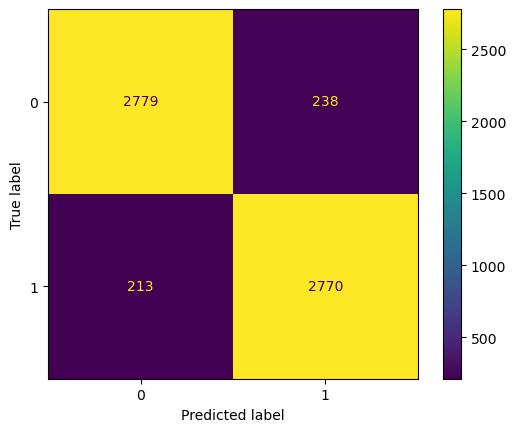

In [138]:
clf = svm.SVC(verbose=True)
clf.fit(X_train_selected, y_train)
y_pred = clf.predict(X_test_selected)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Accuracy:",metrics.recall_score(y_test, y_pred))
conf_mat = confusion_matrix(y_test,y_pred)
displ = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
displ.plot()

In [139]:
params = {
    'C': Real(1e-6, 1e+6, prior='log-uniform'),
    'gamma': Real(1e-6, 100, prior='log-uniform'),
    #'degree': Integer(1,8),
    'kernel': Categorical(['linear', 'sigmoid', 'rbf']),
}

In [140]:
opt = BayesSearchCV(
    svm.SVC(),
    search_spaces=params,
    cv=4,
    scoring='accuracy',
    #random_state=42,
    n_iter=20,
    verbose=1,
)
np.int = int

In [141]:
opt.fit(X_train_selected,y_train)

Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits


KeyboardInterrupt: 